In [1]:
from mtcnn import MTCNN
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [6]:

# List of image paths
image_paths = [
    r'images\image.jpg',
#     r'images\image1.jpg'
    # Add more image paths here
]

# Initialize the MTCNN detector
detector = MTCNN()

    

1/1 [==============================] - 0s 116ms/step


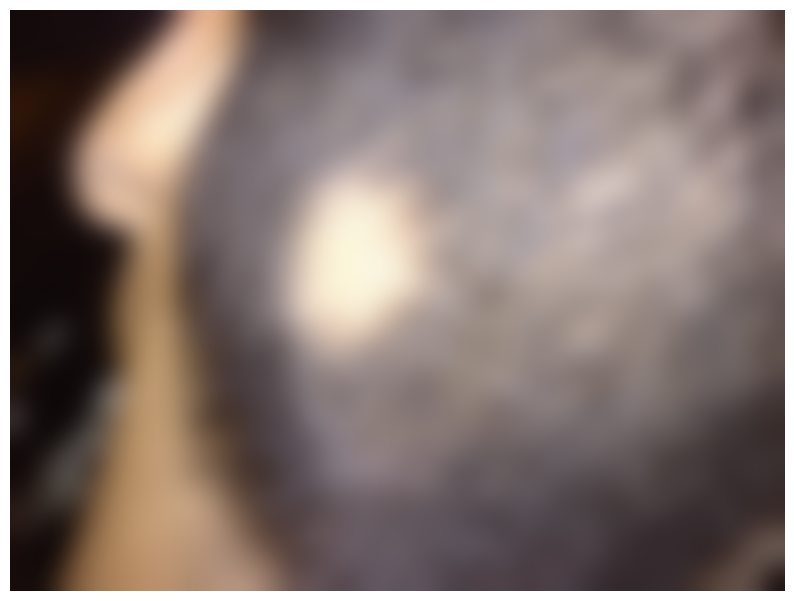

In [7]:
for image_path in image_paths:
    img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    img_with_dets = img.copy()
    min_conf = 0.9

    # Detect and extract the face region
    detections = detector.detect_faces(img)
    if detections:
        x, y, width, height = detections[0]['box']
        face = img[y:y+height, x:x+width]

    # Detect and extract the hair region (you may need to use a different method for hair detection)
    # Here, we assume that the hair region is located slightly above the face
    hair_region = img[y-height//2:y, x:x+width]

    # Create a mask to include everything except the face and hair regions
    mask = np.zeros_like(img)
    mask[y:y+height, x:x+width] = 1
    mask[y-height//2:y, x:x+width] = 1

    # Apply Gaussian blur to the entire image except the face and hair regions
    blurred_img = cv2.GaussianBlur(img, (0, 0), sigmaX=30)

    # Combine the original face and hair regions with the blurred image using the mask
    img_with_dets = img_with_dets * mask + blurred_img * (1 - mask)

    plt.figure(figsize=(10, 10))
    plt.imshow(img_with_dets)
    plt.axis('off')
    plt.show()